<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Breast_cancer_wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/cancer.csv")

In [3]:
df_new = df.drop(['id','Unnamed: 32'],axis =1)

In [4]:
df_new['diagnosis'] = LabelEncoder().fit_transform(df_new['diagnosis'])

In [5]:
X = df_new.drop(['diagnosis'],axis =1)
y = df_new['diagnosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

[2.661e+02 9.390e+01 2.011e+03 5.399e+04 1.499e-01 5.403e+00 1.971e+01
 1.054e+01 2.574e-01 7.431e-05 3.468e+01 9.794e-03 2.506e+02 8.759e+03
 3.266e-03 6.138e-01 1.045e+00 3.052e-01 8.036e-05 6.371e-03 4.917e+02
 1.744e+02 3.665e+03 1.126e+05 3.974e-01 1.931e+01 3.952e+01 1.349e+01
 1.299e+00 2.315e-01]


Text(0, 0.5, 'Features name')

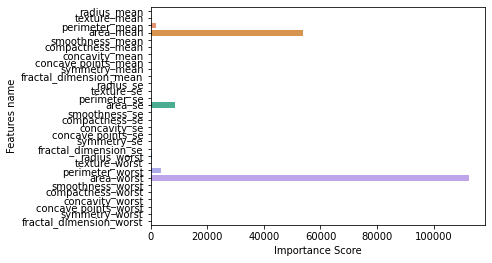

In [7]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
print(score)
Y = X.columns
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [8]:
dc = {'Chi2 ranking': X.columns[score.argsort()[::-1]]}
ranking_chi = pd.DataFrame(data =  dc)
ranking_chi

,Chi2 ranking
0,area_worst
1,area_mean
2,area_se
3,perimeter_worst
4,perimeter_mean
5,radius_worst
6,radius_mean
7,perimeter_se
8,texture_worst
9,texture_mean


In [9]:
ranking_chi.to_excel("cancer_dataset.xlsx",sheet_name='Chi_2')  

In [10]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [11]:
rf.feature_importances_

array([0.029, 0.014, 0.037, 0.042, 0.006, 0.014, 0.04 , 0.112, 0.004,
       0.004, 0.019, 0.004, 0.011, 0.048, 0.005, 0.006, 0.006, 0.005,
       0.003, 0.005, 0.103, 0.017, 0.163, 0.093, 0.013, 0.012, 0.032,
       0.139, 0.011, 0.004])

Text(0.5, 0, 'Feature Importance')

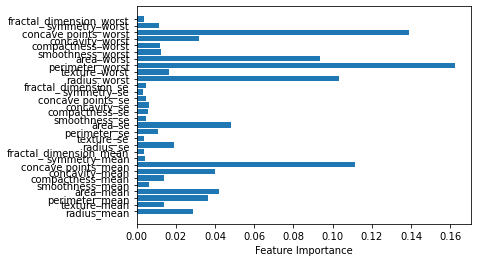

In [12]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [13]:
dc = {'Tree based method Attributes': X.columns[rf.feature_importances_.argsort()[::-1]] }
rank_tree = pd.DataFrame(data =  dc) 
rank_tree

,Tree based method Attributes
0,perimeter_worst
1,concave points_worst
2,concave points_mean
3,radius_worst
4,area_worst
5,area_se
6,area_mean
7,concavity_mean
8,perimeter_mean
9,concavity_worst


In [14]:
from openpyxl import load_workbook

book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_tree.to_excel(writer, "Tree_based_method")
writer.save()

Text(0.5, 0, 'Feature Importance MEAN')

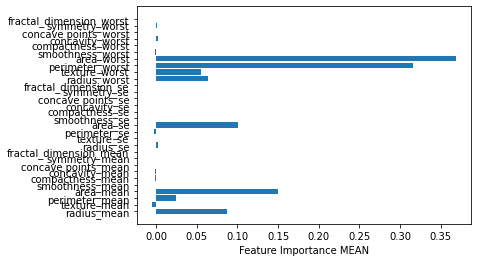

In [15]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

In [16]:
dc = {'Permutation_importance_mean': X.columns[result.importances_mean.argsort()[::-1]]}
rank_per_mean = pd.DataFrame(data =  dc) 
rank_per_mean

,Permutation_importance_mean
0,area_worst
1,perimeter_worst
2,area_mean
3,area_se
4,radius_mean
5,radius_worst
6,texture_worst
7,perimeter_mean
8,concavity_worst
9,radius_se


In [17]:
book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

rank_per_mean.to_excel(writer, "permutation_method_mean")

writer.save()

Text(0.5, 0, 'Feature Importance STD')

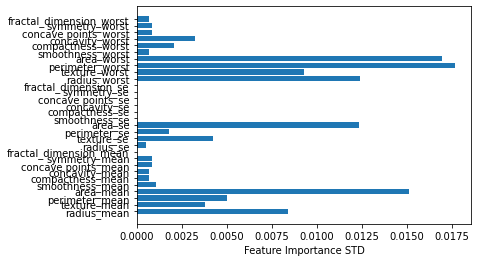

In [18]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [19]:
dc = {'Permutation_importance_std': X.columns[result.importances_std.argsort()[::-1]]}
rank_per_std = pd.DataFrame(data =  dc) 
rank_per_std

,Permutation_importance_std
0,perimeter_worst
1,area_worst
2,area_mean
3,radius_worst
4,area_se
5,texture_worst
6,radius_mean
7,perimeter_mean
8,texture_se
9,texture_mean


In [20]:
book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_std.to_excel(writer, "permutation_method_std")
writer.save()

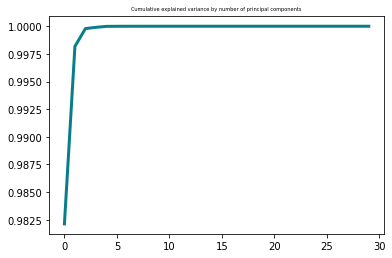

In [21]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [22]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,3.401069,0.794564,-0.336900,-0.244697,0.238787,-0.223405,0.050795,0.042094,-0.140243,0.041949,...,5.339215e-04,-5.774358e-05,-5.257013e-05,1.399863e-04,3.187232e-06,-7.624962e-06,-4.619805e-06,-5.492367e-06,6.683785e-07,5.844152e-08
texture_mean,1.478352,-0.249203,-0.194294,-2.773644,-2.673829,-0.437970,-1.048699,0.040318,0.003300,0.020308,...,-4.443308e-06,3.166811e-06,2.796134e-06,8.931711e-08,1.918707e-06,-2.300430e-06,-3.491139e-07,-2.199705e-07,-2.118372e-07,1.557495e-08
perimeter_mean,23.484303,5.375312,-1.978402,-2.329584,2.079495,-1.431771,0.313419,-0.050448,0.052086,-0.026153,...,-9.148807e-05,2.145163e-05,1.114815e-05,-1.705075e-05,1.607662e-07,6.096182e-07,-4.193885e-07,8.577445e-07,2.043893e-07,-5.695176e-08
area_mean,347.336162,73.821464,-0.916978,0.276782,-0.304596,0.088505,-0.013189,0.001741,-0.001499,0.000577,...,6.706159e-07,-5.585378e-07,-5.666946e-08,-1.493787e-07,-6.742606e-08,-1.831391e-08,5.434870e-08,1.681308e-09,-1.862294e-08,1.431249e-09
smoothness_mean,0.002801,-0.001179,0.001960,-0.002361,0.003576,-0.000507,0.002237,-0.002471,0.003352,-0.001670,...,4.357626e-04,-9.422762e-04,8.303950e-04,-3.665742e-03,-1.764938e-03,-7.999106e-04,1.033634e-04,-5.295373e-05,1.357229e-04,-1.192201e-06


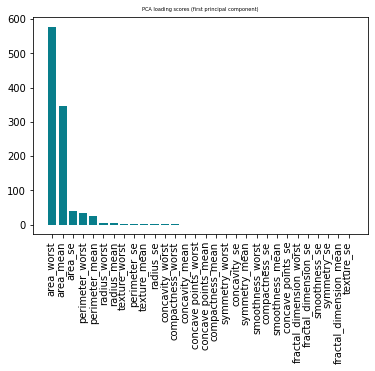

In [23]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
rank_pca = pd.DataFrame(loadings['PC1'])
rank_pca =  rank_pca.sort_values(by='PC1', ascending = False)
rank_pca

,PC1
area_worst,577.711690
area_mean,347.336162
area_se,38.125515
perimeter_worst,33.403637
perimeter_mean,23.484303
radius_worst,4.819534
radius_mean,3.401069
texture_worst,2.042966
perimeter_se,1.523265
texture_mean,1.478352


In [25]:
book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_pca.to_excel(writer, "PCA")
writer.save()

In [26]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([27, 22, 20,  7,  2,  0, 23,  3,  6, 26,  5, 25, 10, 12, 13, 21, 24,
       28,  1, 17,  4,  8, 29, 15, 16, 19, 14, 11,  9, 18])

In [27]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['compactness_worst' 'radius_worst' 'symmetry_se' 'compactness_mean'
 'radius_mean' 'id' 'texture_worst' 'texture_mean' 'smoothness_mean'
 'smoothness_worst' 'area_mean' 'area_worst' 'symmetry_mean' 'radius_se'
 'texture_se' 'fractal_dimension_se' 'perimeter_worst' 'concavity_worst'
 'diagnosis' 'compactness_se' 'perimeter_mean' 'concavity_mean'
 'concave points_worst' 'area_se' 'smoothness_se' 'concave points_se'
 'perimeter_se' 'fractal_dimension_mean' 'concave points_mean'
 'concavity_se']
[8.773e+02 8.012e+02 7.792e+02 7.755e+02 6.376e+02 5.945e+02 5.919e+02
 5.197e+02 4.757e+02 3.879e+02 2.870e+02 2.834e+02 2.416e+02 2.286e+02
 2.154e+02 1.292e+02 1.109e+02 1.061e+02 1.042e+02 9.818e+01 6.970e+01
 5.777e+01 5.691e+01 4.808e+01 3.128e+01 2.040e+00 1.967e+00 4.178e-01
 3.129e-01 2.101e-02]


Text(0, 0.5, 'Features')

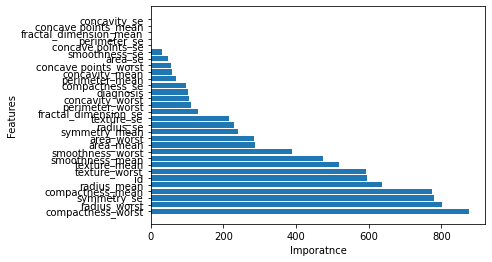

In [28]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [29]:
rank_f_test = pd.DataFrame(best_features_fscore, columns = ['F_test_rank']) 
rank_f_test

,F_test_rank
0,compactness_worst
1,radius_worst
2,symmetry_se
3,compactness_mean
4,radius_mean
5,id
6,texture_worst
7,texture_mean
8,smoothness_mean
9,smoothness_worst


In [30]:
book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_f_test.to_excel(writer, "F_test")
writer.save()

In [31]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['radius_worst', 'texture_worst', 'symmetry_se', 'compactness_mean',
       'compactness_worst', 'radius_mean', 'smoothness_mean',
       'texture_mean', 'id', 'texture_se', 'smoothness_worst',
       'radius_se', 'symmetry_mean', 'area_mean', 'area_worst',
       'smoothness_se', 'compactness_se', 'fractal_dimension_se',
       'diagnosis', 'concavity_worst', 'perimeter_worst',
       'concavity_mean', 'perimeter_mean', 'area_se',
       'concave points_worst', 'concave points_se', 'concavity_se',
       'concave points_mean', 'perimeter_se', 'fractal_dimension_mean'],
      dtype=object)

In [32]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.472, 0.468, 0.455, 0.439, 0.437, 0.407, 0.385, 0.372, 0.367,
       0.336, 0.327, 0.27 , 0.247, 0.233, 0.233, 0.13 , 0.124, 0.122,
       0.095, 0.094, 0.088, 0.069, 0.065, 0.061, 0.051, 0.038, 0.035,
       0.022, 0.003, 0.   ])

Text(0, 0.5, 'Features')

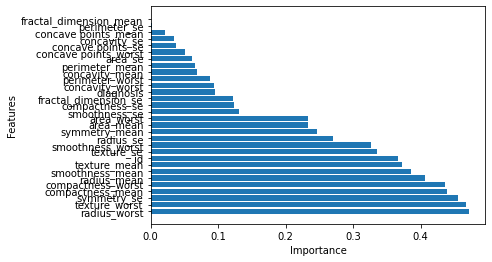

In [33]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [34]:
rank_mutual = pd.DataFrame(best_features_mutual_info,columns = ['Mutual_Info_rank'])
rank_mutual

,Mutual_Info_rank
0,radius_worst
1,texture_worst
2,symmetry_se
3,compactness_mean
4,compactness_worst
5,radius_mean
6,smoothness_mean
7,texture_mean
8,id
9,texture_se


In [35]:
book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_mutual.to_excel(writer, "mutual_info")
writer.save()

In [36]:
df_corr = df_new.corr()
df_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [38]:
corr_rank = pd.DataFrame(df_corr['diagnosis'])
corr_rank = corr_rank.sort_values(by = 'diagnosis',ascending = False)
corr_rank

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [39]:
book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
corr_rank.to_excel(writer, "Pearson_Correlation")
writer.save()

In [40]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [ ]:
estimator = LinearSVC()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

In [42]:
index = selector.ranking_.argsort()
index

array([27,  6, 26, 20,  0, 22, 11, 21, 25,  1, 13,  2, 23,  5, 28, 12,  7,
       24, 29, 16, 10, 15,  8,  4, 17, 18,  3,  9, 19, 14])

In [43]:
X.columns[index]

Index(['concave points_worst', 'concavity_mean', 'concavity_worst',
       'radius_worst', 'radius_mean', 'perimeter_worst', 'texture_se',
       'texture_worst', 'compactness_worst', 'texture_mean', 'area_se',
       'perimeter_mean', 'area_worst', 'compactness_mean', 'symmetry_worst',
       'perimeter_se', 'concave points_mean', 'smoothness_worst',
       'fractal_dimension_worst', 'concavity_se', 'radius_se',
       'compactness_se', 'symmetry_mean', 'smoothness_mean',
       'concave points_se', 'symmetry_se', 'area_mean',
       'fractal_dimension_mean', 'fractal_dimension_se', 'smoothness_se'],
      dtype='object')

In [44]:
dc = {'Rank_RFE': X.columns[index]}
rank_RFE = pd.DataFrame(data =  dc) 
rank_RFE

,Rank_RFE
0,concave points_worst
1,concavity_mean
2,concavity_worst
3,radius_worst
4,radius_mean
5,perimeter_worst
6,texture_se
7,texture_worst
8,compactness_worst
9,texture_mean


In [45]:
book = load_workbook('/content/cancer_dataset.xlsx')
writer = pd.ExcelWriter('/content/cancer_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_RFE.to_excel(writer, "RFE")
writer.save()